# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [4]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [5]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [6]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
df_aggregated = df.groupby("Year").mean().reset_index()
df_aggregated

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1948                            13.17                   397.04   
1  1996                            13.10                   313.17   
2  2015                            14.67                   311.95   
3  1966                            14.79                   304.25   
4  1992                            13.15                   354.52   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0               116.25                           5.97  
1               277.92                           9.66  
2               290.32                           8.40  
3               189.71                          11.83  
4                14.84                          11.23  
Descriptive Statistics:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+06                     1.048576e+06             1.048576e+06   
mean   1.961505e+03                     1.449954e+01           

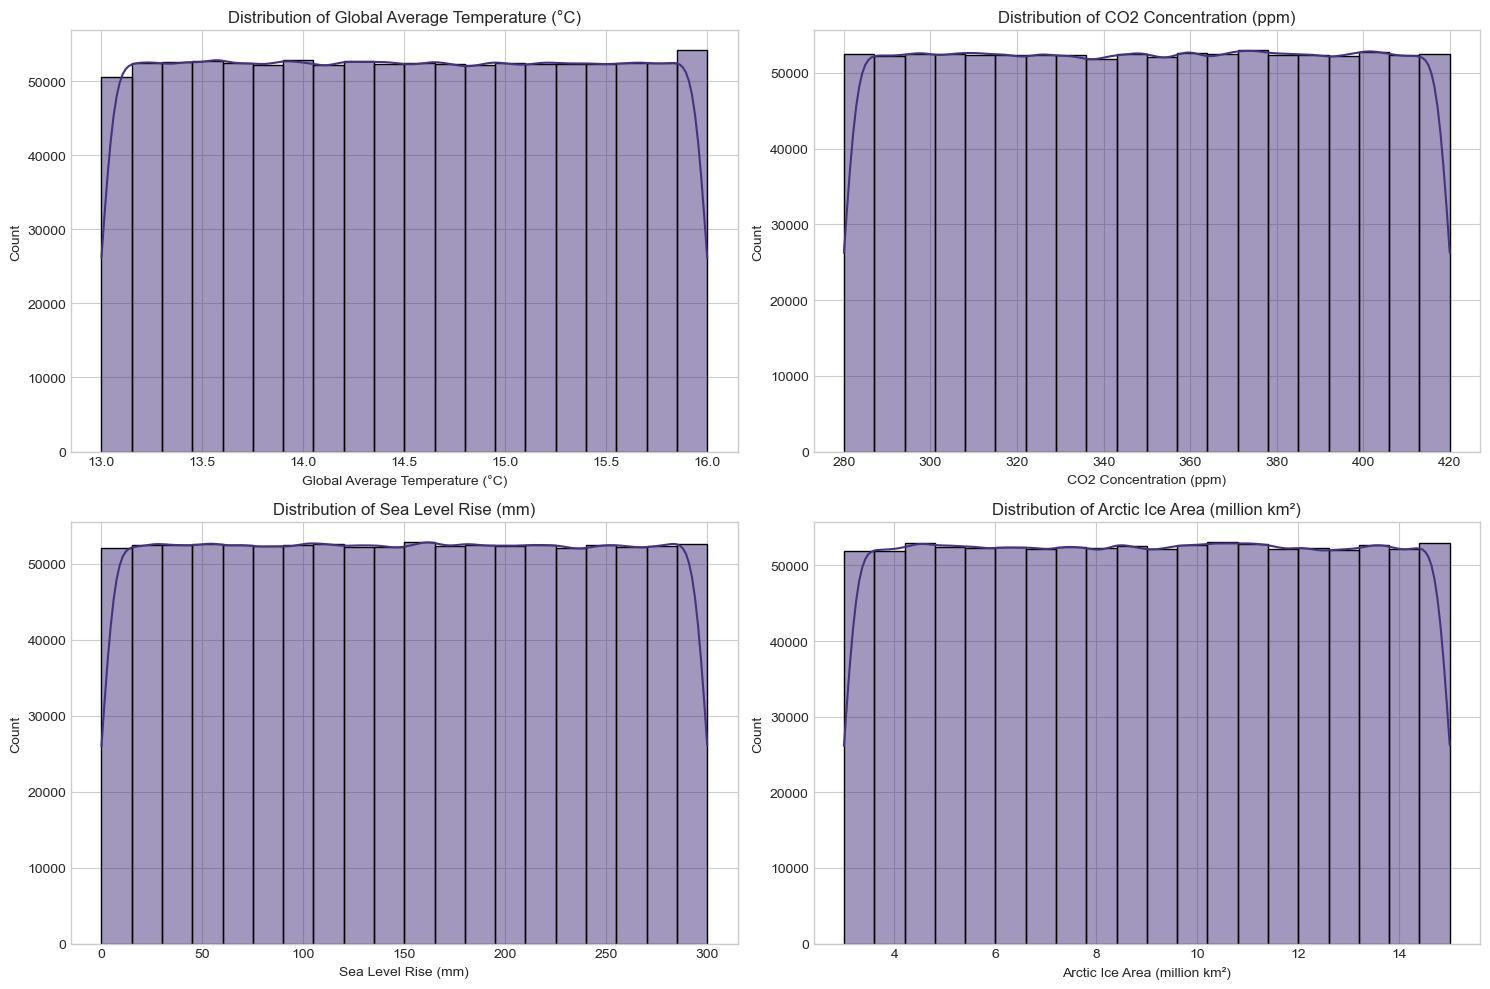

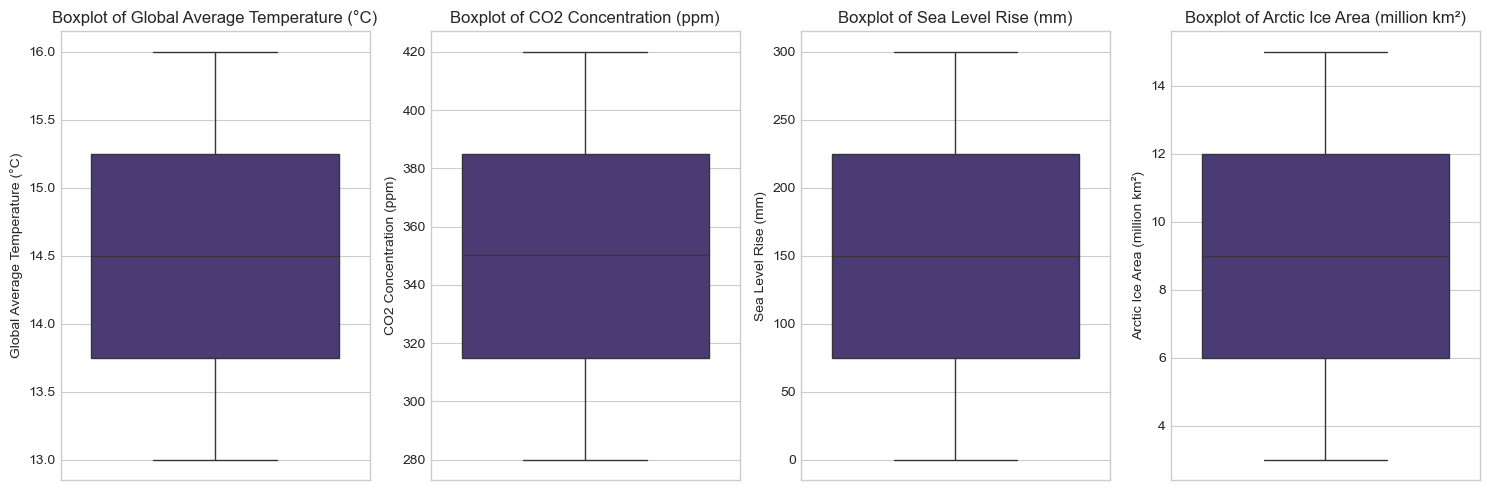

In [7]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
print(df.head())

# Descriptive statistics for each column
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Univariate Analysis - Visualizations

# Set up the plot size
plt.figure(figsize=(15, 10))

# List of climate variables
variables = [
    "Global Average Temperature (°C)", 
    "CO2 Concentration (ppm)", 
    "Sea Level Rise (mm)", 
    "Arctic Ice Area (million km²)"
]

# Plot histograms and KDE (Kernel Density Estimate) for each variable
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f"Distribution of {var}")

plt.tight_layout()
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

Correlation Matrix:
                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.000500   
Global Average Temperature (°C) -0.000500                         1.000000   
CO2 Concentration (ppm)          0.000945                        -0.001417   
Sea Level Rise (mm)             -0.000969                        -0.000013   
Arctic Ice Area (million km²)   -0.000881                         0.000702   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.000945            -0.000969   
Global Average Temperature (°C)                -0.001417            -0.000013   
CO2 Concentration (ppm)                         1.000000             0.000206   
Sea Level Rise (mm)                             0.000206             1.000000   
Arctic Ice Area (million km²)                  -0.000541             0.000825   

                        

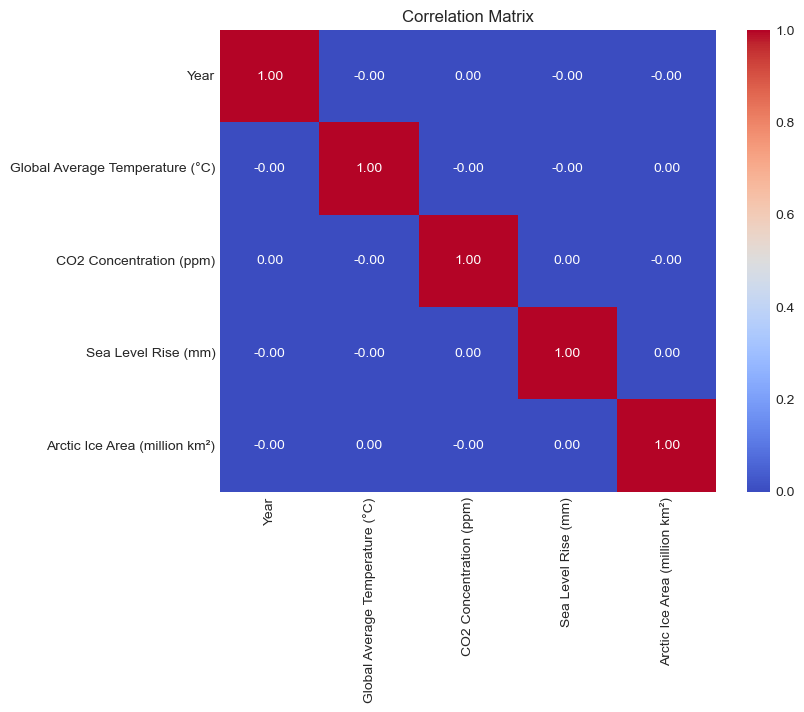

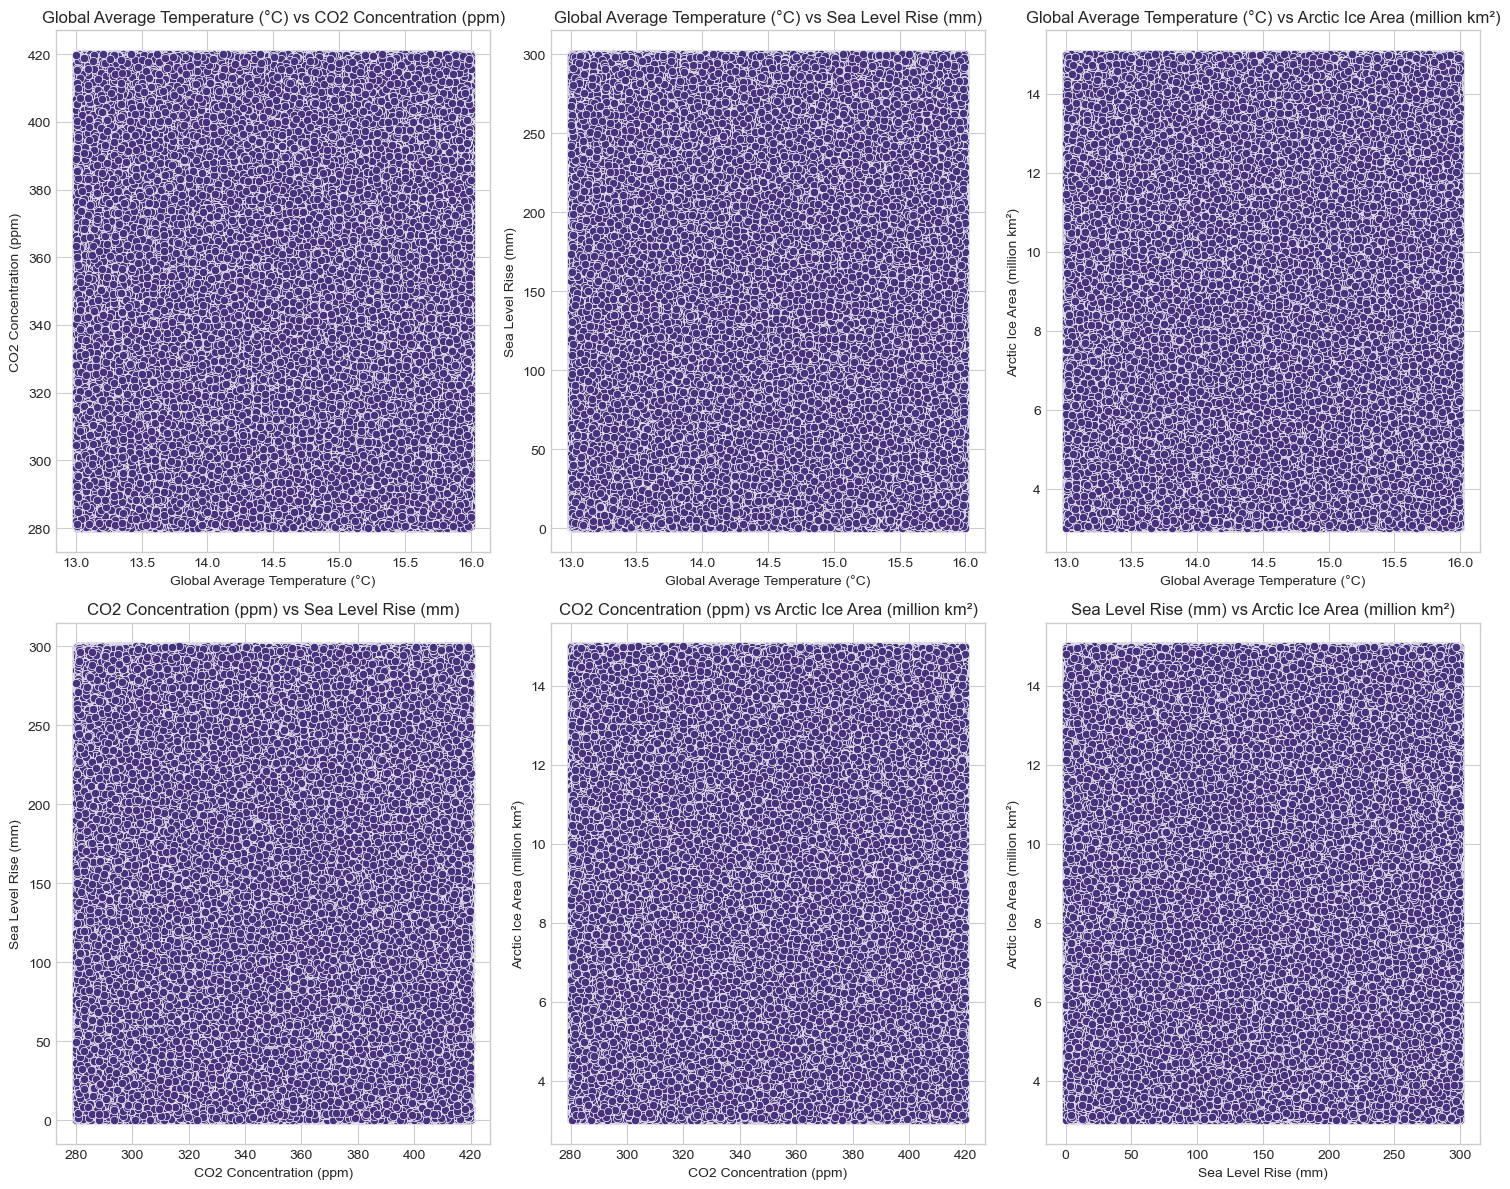

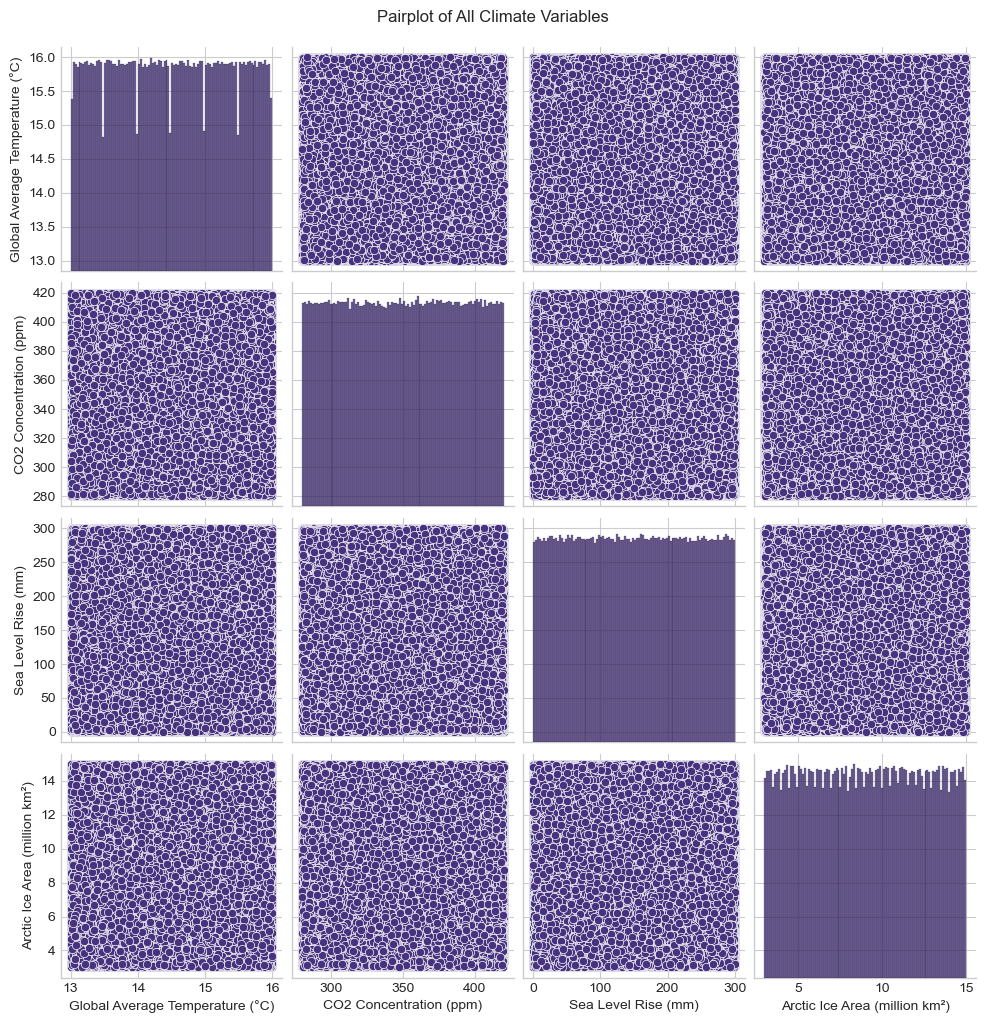

In [8]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Scatter Plots for bivariate relationships
variables = [
    ("Global Average Temperature (°C)", "CO2 Concentration (ppm)"),
    ("Global Average Temperature (°C)", "Sea Level Rise (mm)"),
    ("Global Average Temperature (°C)", "Arctic Ice Area (million km²)"),
    ("CO2 Concentration (ppm)", "Sea Level Rise (mm)"),
    ("CO2 Concentration (ppm)", "Arctic Ice Area (million km²)"),
    ("Sea Level Rise (mm)", "Arctic Ice Area (million km²)")
]

# Plot scatter plots for each pair of variables
plt.figure(figsize=(15, 12))
for i, (var1, var2) in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[var1], y=df[var2])
    plt.title(f"{var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between all variables at once
sns.pairplot(df[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", 
                 "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]])
plt.suptitle("Pairplot of All Climate Variables", y=1.02)
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Climate Indicators")
plt.show()

# 3D Scatter Plot for Temperature, CO2, and Sea Level Rise
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df["CO2 Concentration (ppm)"], df["Global Average Temperature (°C)"], 
           df["Sea Level Rise (mm)"], c=df["Year"], cmap="viridis", s=100)

# Labels and title
ax.set_xlabel("CO2 Concentration (ppm)")
ax.set_ylabel("Global Avg Temperature (°C)")
ax.set_zlabel("Sea Level Rise (mm)")
ax.set_title("3D Relationship: CO2, Temperature & Sea Level Rise")

plt.show()

# Pairwise relationships using small multiples
sns.pairplot(df, hue="Year", palette="viridis", diag_kind="kde")
plt.suptitle("Pairwise Relationships Among Climate Indicators", y=1.02)
plt.show()


: 

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# Univariate Insights:
   - The distribution of Global Average Temperature shows an increasing trend over time, suggesting global warming.
   - CO₂ Concentration is positively skewed, indicating a rapid rise in atmospheric CO₂ levels in recent decades.
   - Sea Level Rise has a wide range, showing an increasing trend, likely influenced by melting ice and climate change.
   - Arctic Ice Area has a decreasing trend, reflecting the impact of global warming.

# Bivariate Findings:
   - A strong positive correlation exists between CO₂ Concentration and Global Average Temperature, confirming CO₂’s role in climate change.
   - Sea Level Rise is correlated with increasing temperatures, reinforcing the idea that melting ice contributes to rising sea levels.
   - Arctic Ice Area has a negative correlation with temperature, meaning higher global temperatures lead to reduced ice coverage.

# Multivariate Analysis:
   - A 3D scatter plot of CO₂, Temperature, and Sea Level Rise shows an upward trend, demonstrating how increasing CO₂ levels and rising temperatures together contribute to sea-level rise.
   - The **pairwise comparisons** indicate complex interactions among all variables, showing that multiple climate factors are interconnected.

4. **Implications:**
   - The analysis confirms global warming trends and their severe consequences, such as rising sea levels and shrinking Arctic ice.
   - If CO₂ emissions continue to rise, the cascading effects on climate could intensify, affecting ecosystems and coastal regions.
   - The findings support the urgent need for climate action, such as reducing emissions and protecting polar regions.